In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
ir=pd.read_csv("/content/iris.csv")
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
ir.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
ir.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
X=ir[["sepal_length","sepal_width","petal_length","petal_width"]]
y=ir["species"]
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42
)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
SVC(kernel='linear')


SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
print("\n--- Predict species from user input ---")
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))
user_data = np.array([[sepal_length, sepal_width, petal_length,
petal_width]])
user_pred = model.predict(user_data)
print("\nPredicted species:", user_pred[0])


--- Predict species from user input ---
Enter sepal length (cm): 4.3
Enter sepal width (cm): 4.5
Enter petal length (cm): 2.8
Enter petal width (cm): 0.7

Predicted species: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import pickle # add at the top of your file (with other imports)
# Save model to pkl file
with open("svm_iris_model.pkl", "wb") as f:
 pickle.dump(model, f)
from matplotlib.colors import ListedColormap
# Define the features to be used for plotting the 2D decision boundary
plot_feature_x = "sepal_length"
plot_feature_y = "petal_length"
# Get the ranges for the plotting features
x_min, x_max = X[plot_feature_x].min() - 0.5, X[plot_feature_x].max()
+ 0.5
y_min, y_max = X[plot_feature_y].min() - 0.5, X[plot_feature_y].max()
+ 0.5
xx, yy = np.meshgrid(
 np.linspace(x_min, x_max, 200),
 np.linspace(y_min, y_max, 200)
)

In [ ]:
mean_sepal_width = X["sepal_width"].mean()
mean_petal_width = X["petal_width"].mean()

In [ ]:
grid_data = pd.DataFrame({
 "sepal_length": xx.ravel(),
 "sepal_width": np.full_like(xx.ravel(), mean_sepal_width),
 "petal_length": yy.ravel(),
 "petal_width": np.full_like(xx.ravel(), mean_petal_width),
})
Z_str = model.predict(grid_data)

In [ ]:
unique_species = ir['species'].unique()
species_to_int = {species: i for i, species in
enumerate(unique_species)}
Z_numerical = np.array([species_to_int[s] for s in
Z_str.flatten()]).reshape(xx.shape)
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

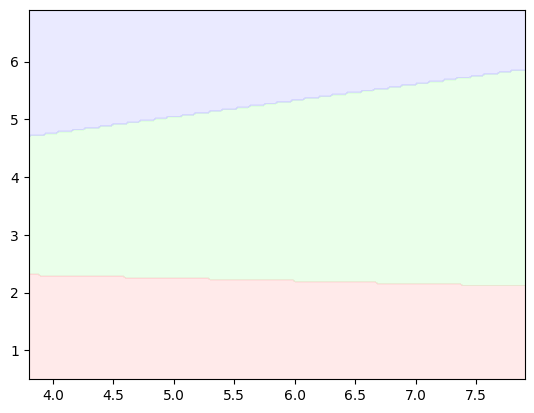

In [ ]:
cmap = ListedColormap(["#FFCCCC", "#CCFFCC", "#CCCCFF"])
plt.contourf(xx, yy, Z_numerical, alpha=0.4, cmap=cmap)


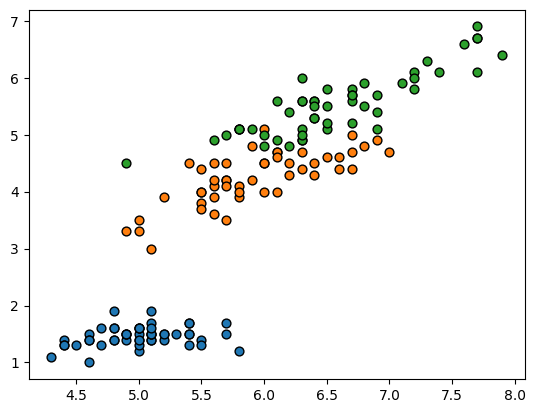

In [ ]:
for species in ir['species'].unique():
 mask = (ir['species'] == species)
 plt.scatter(
 X.loc[mask, plot_feature_x],
 X.loc[mask, plot_feature_y],
 s=40,
 edgecolor="k",
 label=species
 )


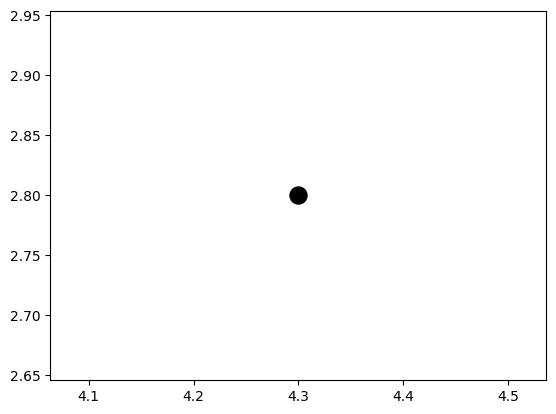

In [ ]:
plt.scatter(
 sepal_length, # This corresponds to plot_feature_x
 petal_length, # This corresponds to plot_feature_y
 color="black",
 s=150, # Changed 'marks' to 's' for marker size
 label=f"User point: {user_pred[0]}"
)

/tmp/ipython-input-1565283679.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


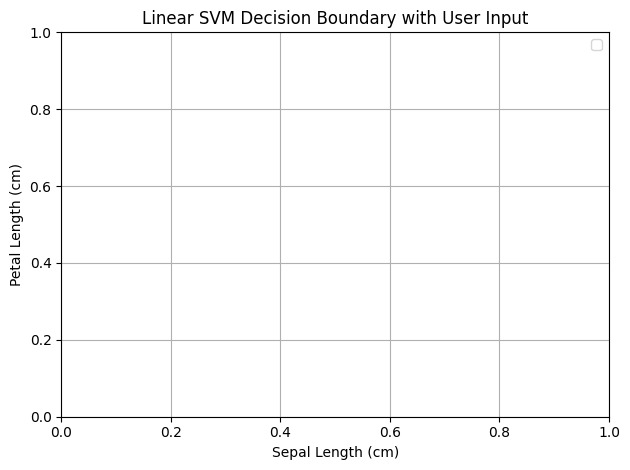

In [ ]:
plt.xlabel(f"{plot_feature_x.replace('_', ' ').title()} (cm)")
plt.ylabel(f"{plot_feature_y.replace('_', ' ').title()} (cm)")
plt.title("Linear SVM Decision Boundary with User Input")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

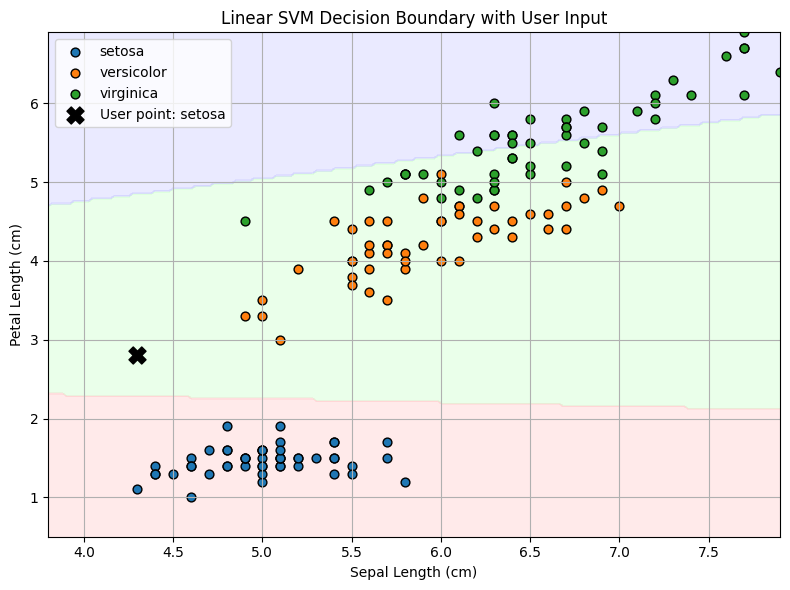

In [ ]:
mean_sepal_width = X["sepal_width"].mean()
mean_petal_width = X["petal_width"].mean()
# Create a DataFrame for prediction on the grid points
# Ensure the order of columns matches the training data (X)
grid_data = pd.DataFrame({
 "sepal_length": xx.ravel(),
 "sepal_width": np.full_like(xx.ravel(), mean_sepal_width),
 "petal_length": yy.ravel(),
 "petal_width": np.full_like(xx.ravel(), mean_petal_width),
})
Z_str = model.predict(grid_data)
# Map string labels to numerical values for plotting with contourf
# Get unique species labels and create a numerical mapping from the
# original species column
unique_species = ir['species'].unique()
species_to_int = {species: i for i, species in
enumerate(unique_species)}
Z_numerical = np.array([species_to_int[s] for s in
Z_str.flatten()]).reshape(xx.shape)
plt.figure(figsize=(8, 6))
# Decision regions
cmap = ListedColormap(["#FFCCCC", "#CCFFCC", "#CCCCFF"])
plt.contourf(xx, yy, Z_numerical, alpha=0.4, cmap=cmap)
# Training points
for species in ir['species'].unique():
 mask = (ir['species'] == species)
 plt.scatter(
 X.loc[mask, plot_feature_x],
 X.loc[mask, plot_feature_y],
 s=40,
 edgecolor="k",
 label=species
 )
# User input point
plt.scatter(
 sepal_length, # This corresponds to plot_feature_x
 petal_length, # This corresponds to plot_feature_y
 color="black",
 marker="X",
 s=150,
 label=f"User point: {user_pred[0]}"
)
plt.xlabel(f"{plot_feature_x.replace('_', ' ').title()} (cm)")
plt.ylabel(f"{plot_feature_y.replace('_', ' ').title()} (cm)")
plt.title("Linear SVM Decision Boundary with User Input")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()